<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-&amp;-Model-Load" data-toc-modified-id="Data-&amp;-Model-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data &amp; Model Load</a></span></li><li><span><a href="#Devolution" data-toc-modified-id="Devolution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Devolution</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li><li><span><a href="#DeconvNet-+-SmoothGrad" data-toc-modified-id="DeconvNet-+-SmoothGrad-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DeconvNet + SmoothGrad</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li></ul></div>

**Reference**
- https://github.com/huybery/VisualizingCNN

In [1]:
import numpy as np
import sys

import matplotlib.pyplot as plt

sys.path.append('../code')
from model import SimpleCNNDeconv
from saliency.attribution_methods import DeconvNet
from saliency.ensembles import generate_smooth_grad
from utils import get_samples

# config
image_save = True

# Data & Model Load

**MNIST**

In [2]:
original_images_mnist, pre_images_mnist, mnist_classes, mnist_model = get_samples('mnist')
mnist_model_deconv = SimpleCNNDeconv('mnist')

Data Complete
Model Complete


**CIFAR10**

In [3]:
original_images_cifar10, pre_images_cifar10, cifar10_classes, cifar10_model = get_samples('cifar10')
cifar10_model_deconv = SimpleCNNDeconv('cifar10')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Data Complete
Model Complete


# Devolution

In [4]:
mnist_deconvnet = DeconvNet(mnist_model, mnist_model_deconv)
cifar10_deconvnet = DeconvNet(cifar10_model, cifar10_model_deconv)

In [5]:
# conv layer index
conv_layer_idx = [0,4,8]

## MNIST

In [7]:
# output list
nb_class = 10
nb_layer = len(conv_layer_idx)
outputs = np.zeros((nb_class*nb_layer,) + original_images_mnist.shape[1:], dtype=np.uint8) # (nb_class * nb_conv_layer, image size)
outputs_max = np.zeros((nb_class*nb_layer,) + original_images_mnist.shape[1:], dtype=np.uint8) # (nb_class * nb_conv_layer, image size)
preds = np.zeros(10)
probs = np.zeros(10)
cnt = 0
    
for i in range(nb_class):    
    for conv_idx in conv_layer_idx:
        pre_image = pre_images_mnist[i].unsqueeze(0)
        output, prob, pred = mnist_deconvnet.generate_image(pre_image, conv_idx, i, False)
        output_max, _, _ = mnist_deconvnet.generate_image(pre_image, conv_idx, i, True)
        outputs[cnt] = output
        outputs_max[cnt] = output_max
        cnt += 1
    preds[i] = pred
    probs[i] = prob

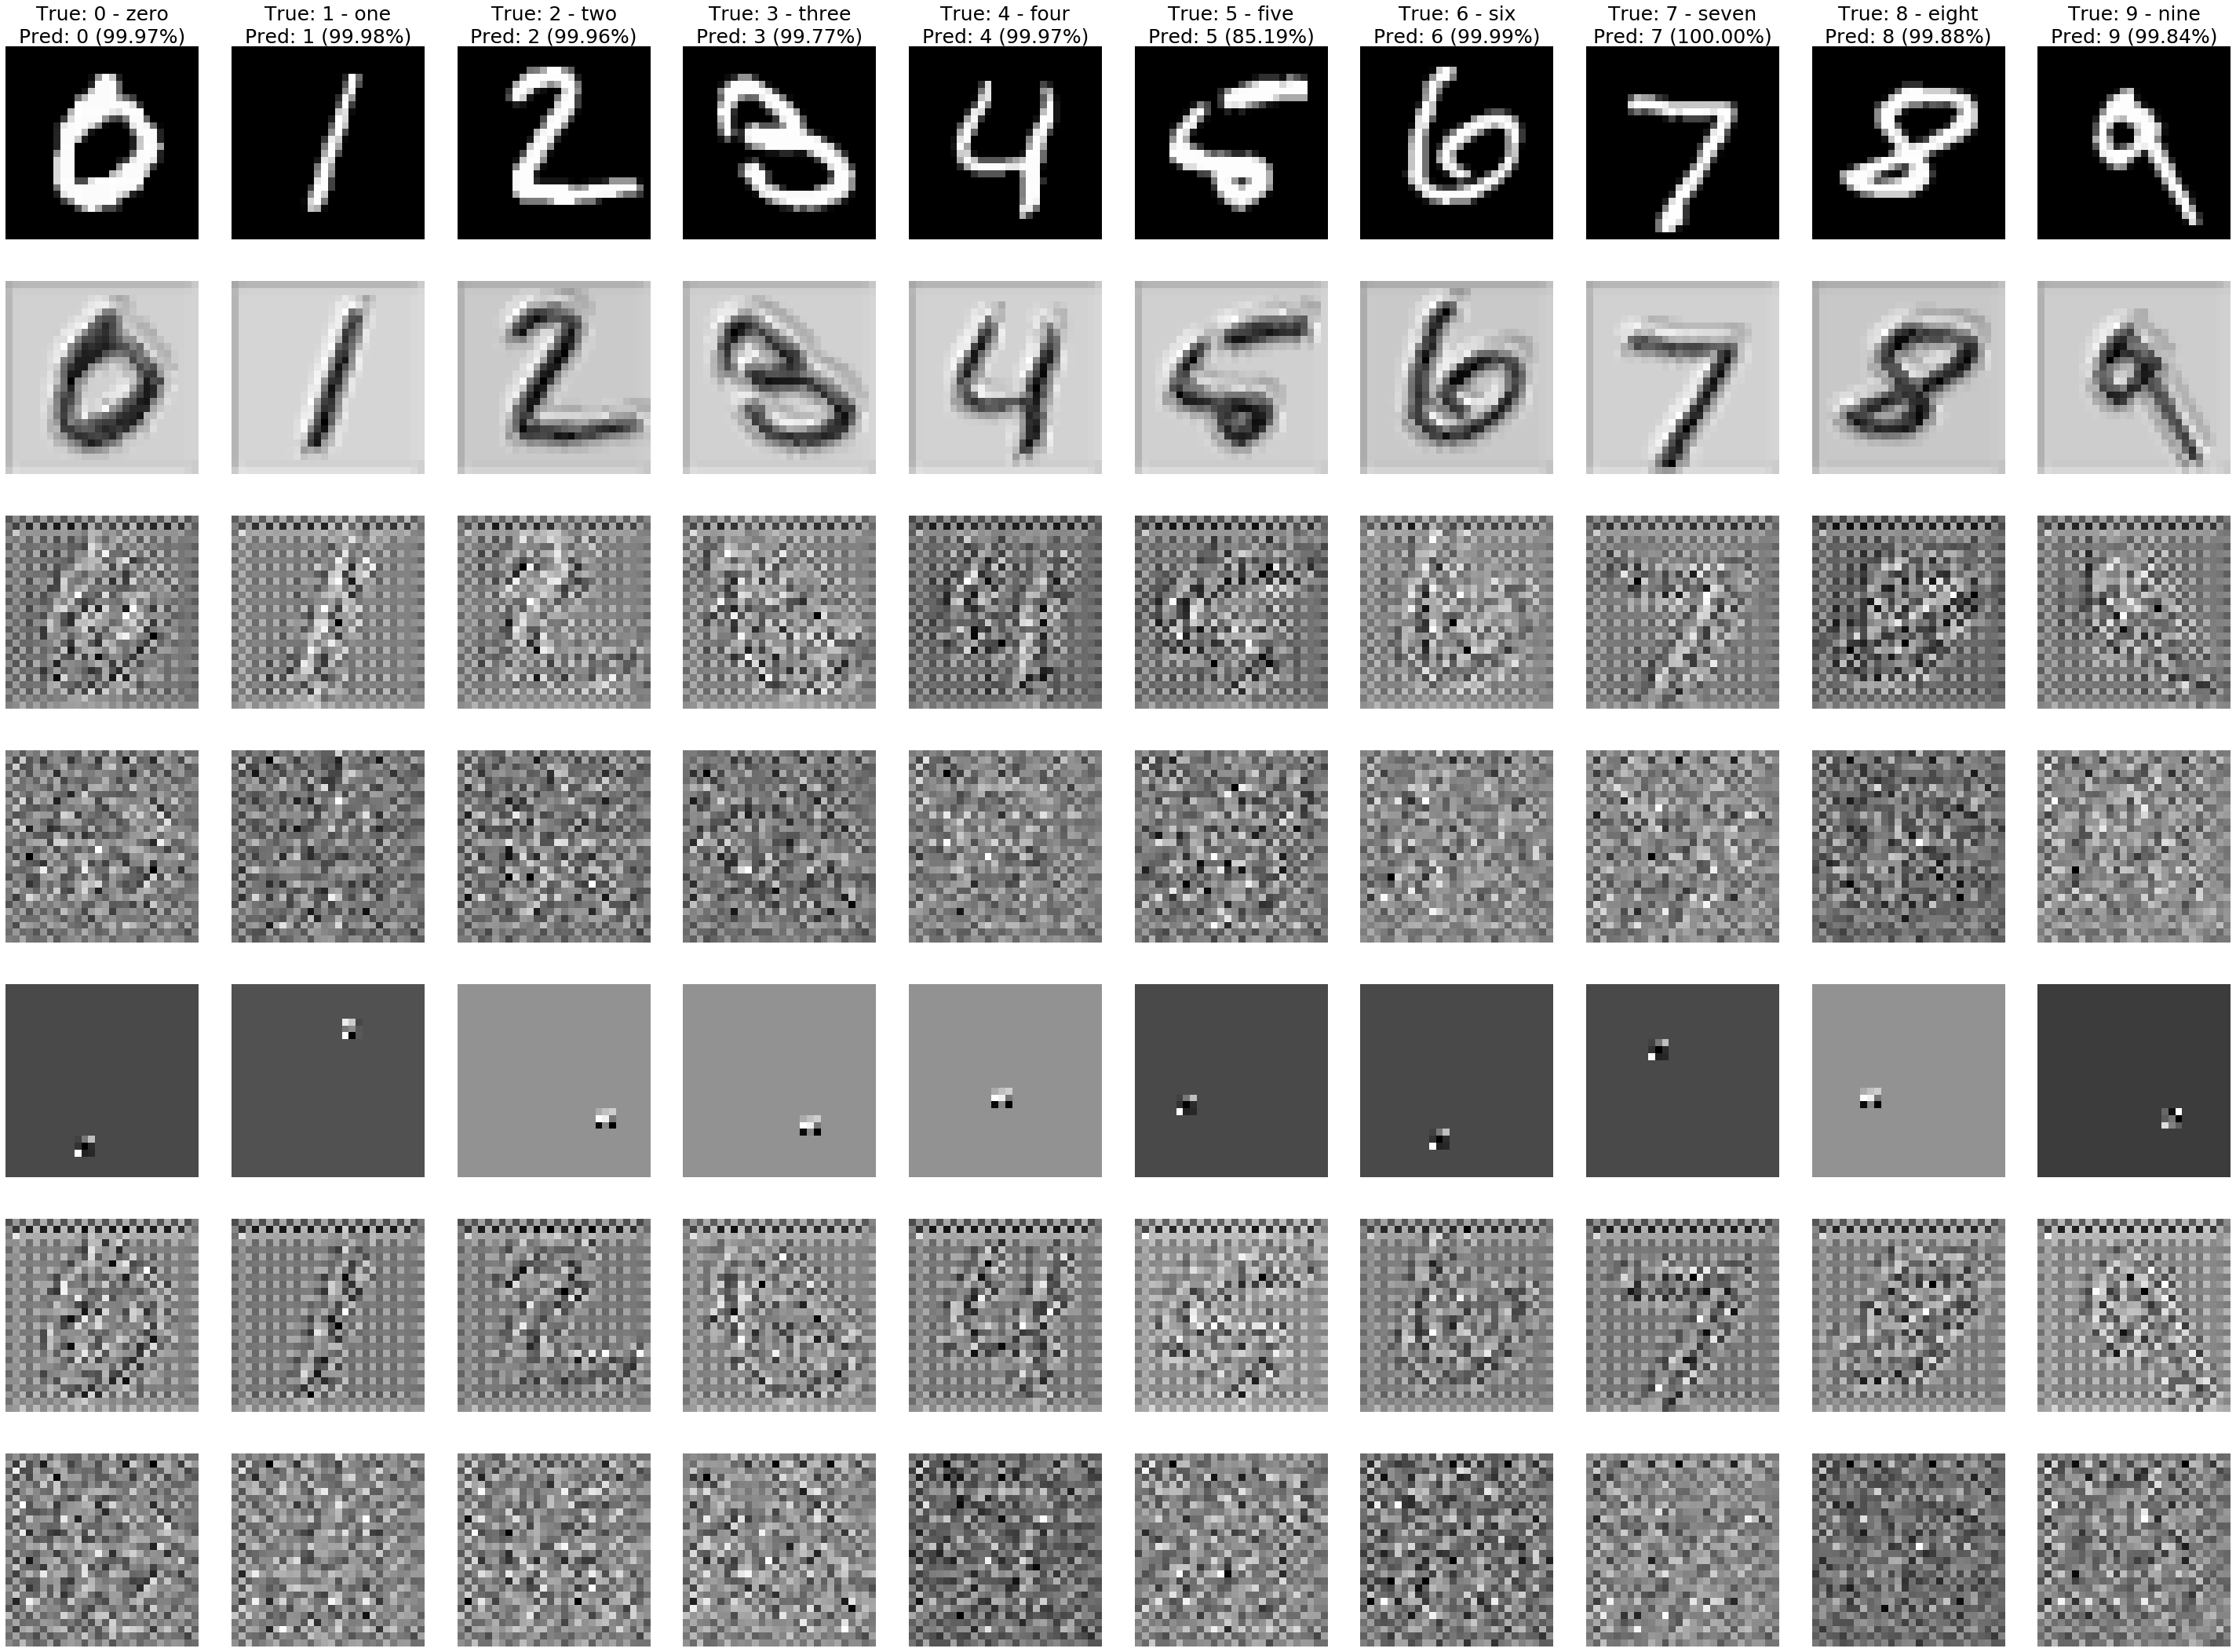

In [8]:
f, ax = plt.subplots(7, 10, figsize=(40,30))
for i in range(10):
    # Raw images
    ax[0, i].imshow(original_images_mnist[i].squeeze(), 'gray')
    ax[0, i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(mnist_classes[i], int(preds[i]), probs[i]), size=25)
    
    # Deconv images
    ax[1, i].imshow(outputs[0+(i*3)].squeeze(), 'gray')
    ax[2, i].imshow(outputs[1+(i*3)].squeeze(), 'gray')
    ax[3, i].imshow(outputs[2+(i*3)].squeeze(), 'gray')
    
    # Deconv images (Max Activation)
    ax[4, i].imshow(outputs_max[0+(i*3)].squeeze(), 'gray')
    ax[5, i].imshow(outputs_max[1+(i*3)].squeeze(), 'gray')
    ax[6, i].imshow(outputs_max[2+(i*3)].squeeze(), 'gray')
    
    ax[0, i].axis('off')
    ax[1, i].axis('off')
    ax[2, i].axis('off')
    ax[3, i].axis('off')
    ax[4, i].axis('off')
    ax[5, i].axis('off')
    ax[6, i].axis('off')

if image_save:
    plt.tight_layout()
    plt.savefig('../images/results/deconv_mnist_result.jpg', dpi=500)
    plt.show()

## CIFAR10

In [6]:
# output list
nb_class = 10
nb_layer = len(conv_layer_idx)
outputs = np.zeros((nb_class*nb_layer,) + original_images_cifar10.shape[1:], dtype=np.uint8) # (nb_class * nb_conv_layer, image size)
outputs_max = np.zeros((nb_class*nb_layer,) + original_images_cifar10.shape[1:], dtype=np.uint8) # (nb_class * nb_conv_layer, image size)
preds = np.zeros(10)
probs = np.zeros(10)
cnt = 0
    
for i in range(nb_class):    
    for conv_idx in conv_layer_idx:
        pre_image = pre_images_cifar10[i].unsqueeze(0)
        output, prob, pred = cifar10_deconvnet.generate_image(pre_image, conv_idx, i, False)
        output_max, _, _ = cifar10_deconvnet.generate_image(pre_image, conv_idx, i, True)
        outputs[cnt] = output
        outputs_max[cnt] = output_max
        cnt += 1
    preds[i] = pred
    probs[i] = prob

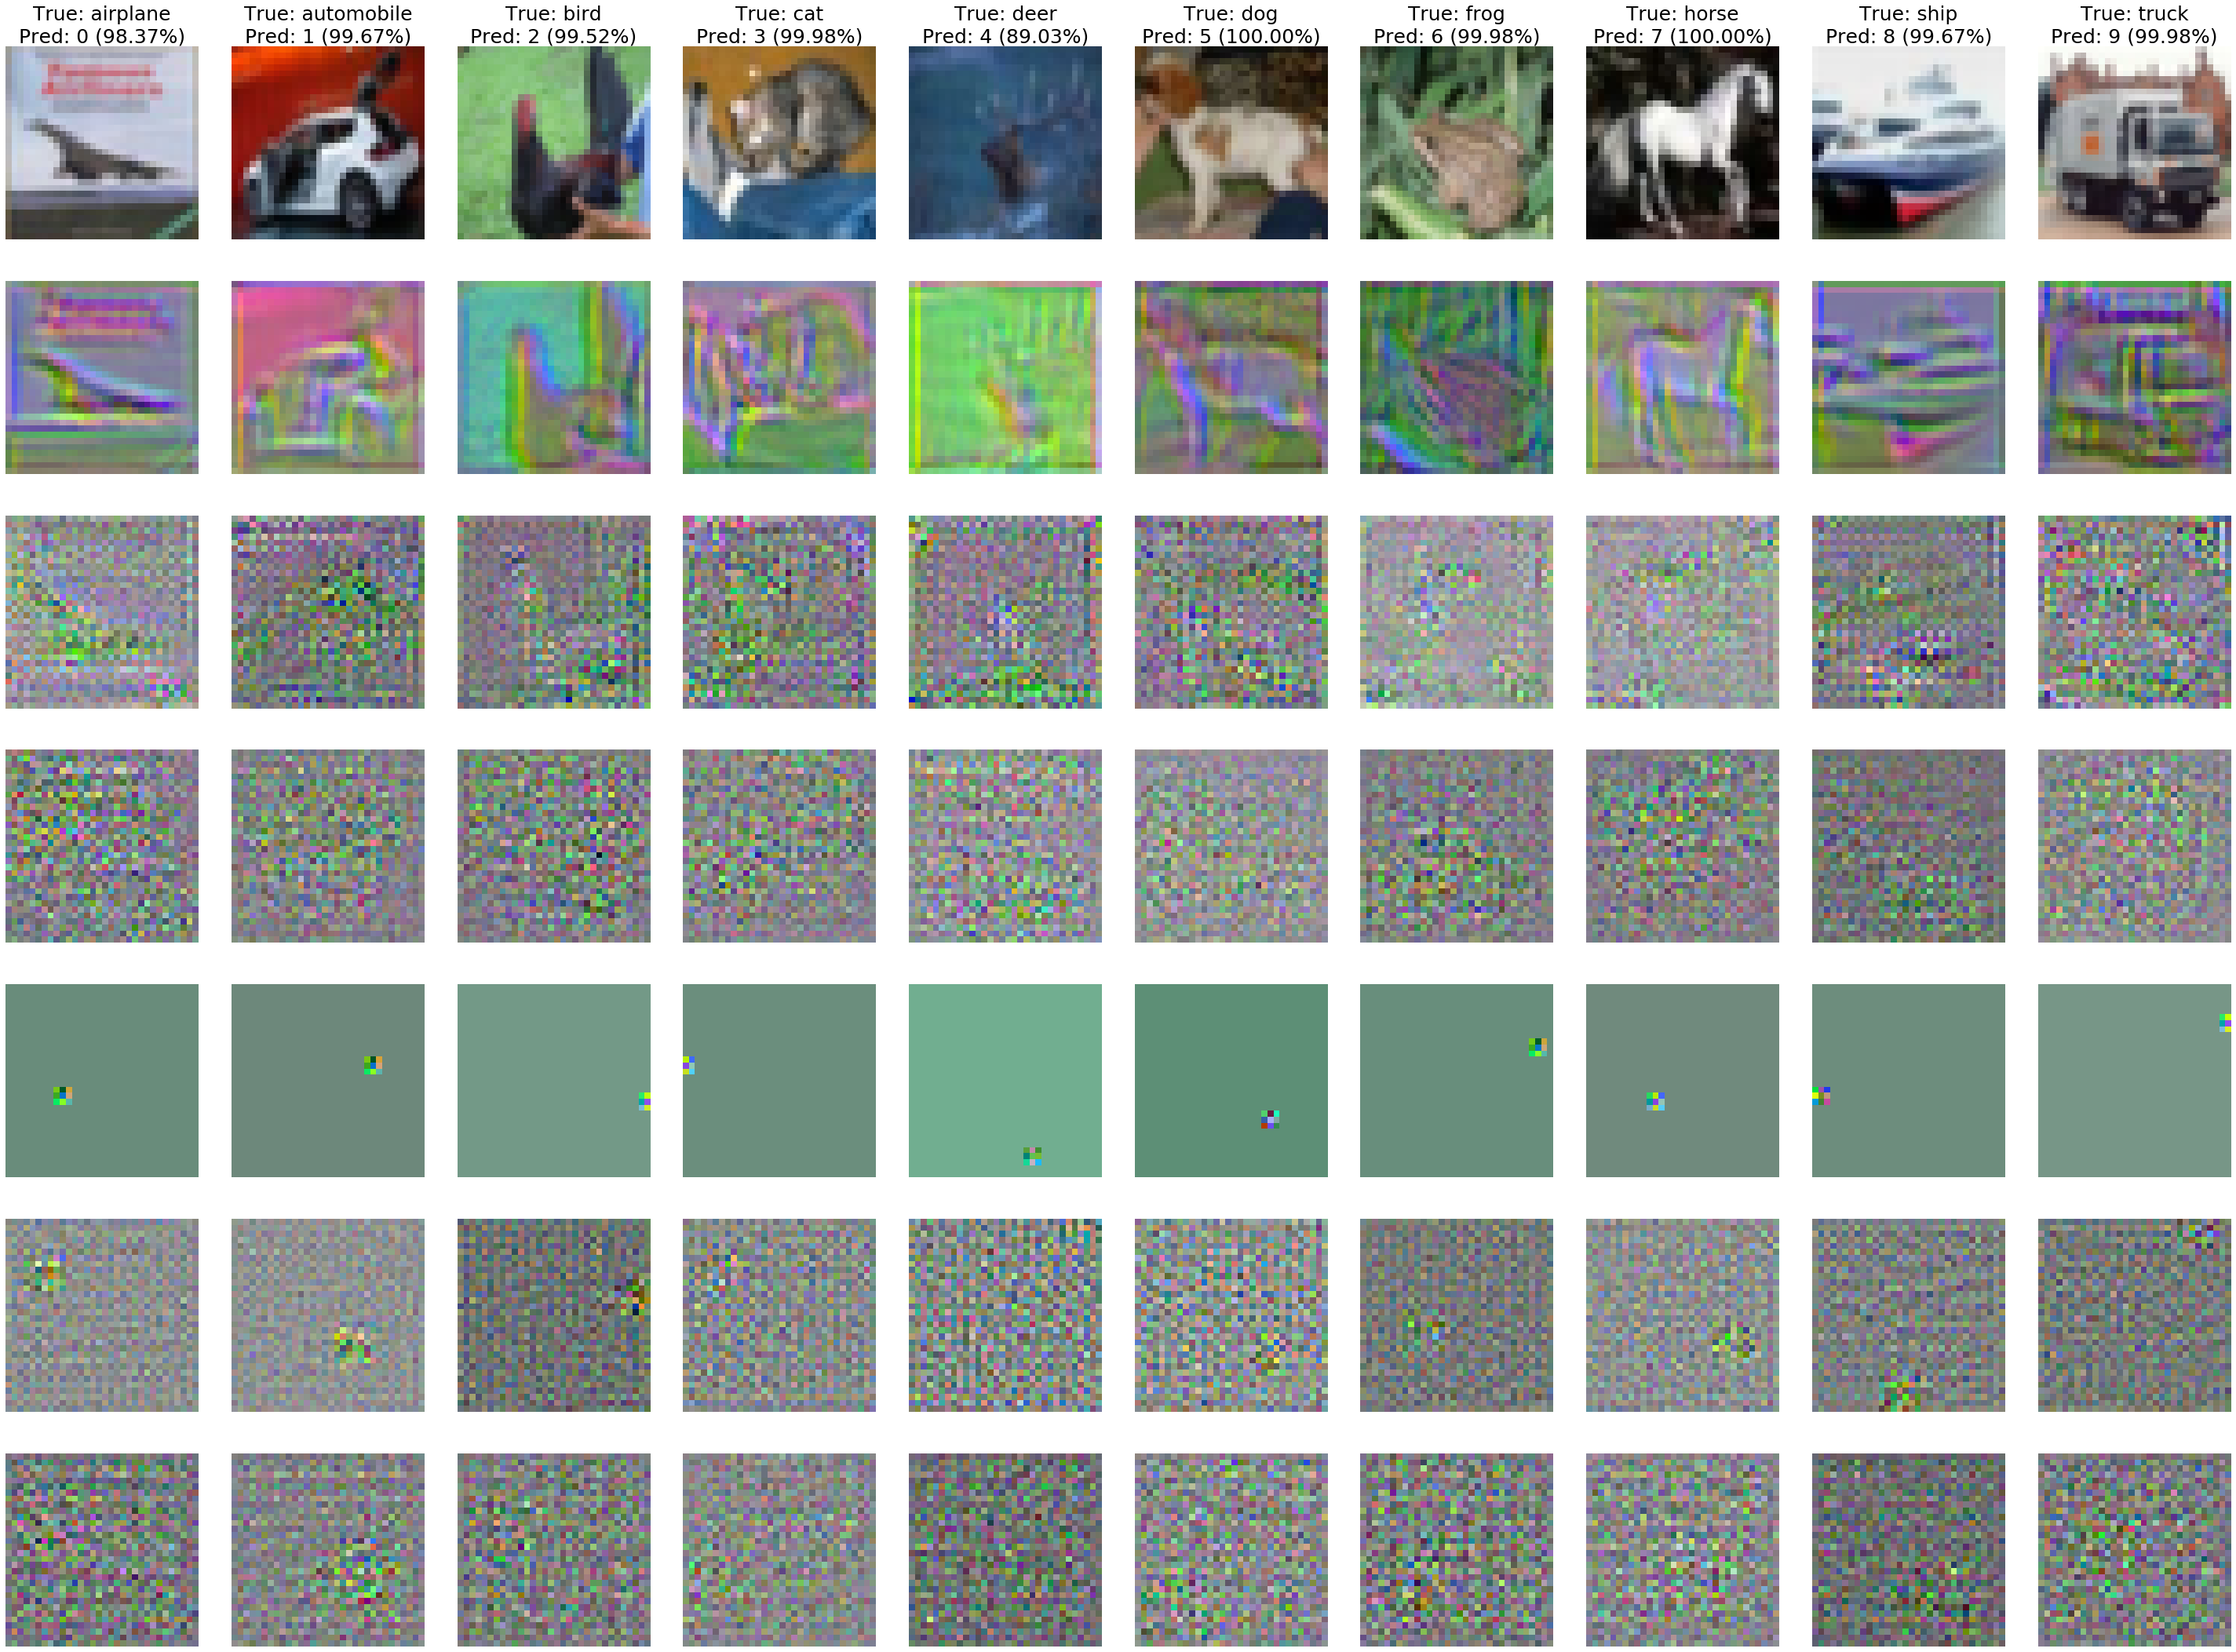

In [7]:
f, ax = plt.subplots(7, 10, figsize=(40,30))
for i in range(10):
    # Raw images
    ax[0, i].imshow(original_images_cifar10[i].squeeze())
    ax[0, i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(cifar10_classes[i], int(preds[i]), probs[i]), size=25)
    
    # Deconv images
    ax[1, i].imshow(outputs[0+(i*3)])
    ax[2, i].imshow(outputs[1+(i*3)])
    ax[3, i].imshow(outputs[2+(i*3)])
    
    # Deconv images (Max Activation)
    ax[4, i].imshow(outputs_max[0+(i*3)])
    ax[5, i].imshow(outputs_max[1+(i*3)])
    ax[6, i].imshow(outputs_max[2+(i*3)])
    
    ax[0, i].axis('off')
    ax[1, i].axis('off')
    ax[2, i].axis('off')
    ax[3, i].axis('off')
    ax[4, i].axis('off')
    ax[5, i].axis('off')
    ax[6, i].axis('off')

if image_save:
    plt.tight_layout()
    plt.savefig('../images/results/deconv_cifar10_result.jpg', dpi=500)
    plt.show()

# DeconvNet + SmoothGrad

## MNIST

In [10]:
# output list
nb_class = 10
nb_layer = len(conv_layer_idx)
outputs = np.zeros((nb_class*nb_layer,) + original_images_mnist.shape[1:], dtype=np.uint8) # (nb_class * nb_conv_layer, image size)
preds = np.zeros(10)
probs = np.zeros(10)

cnt = 0

# set parameter
n = 50
sigma = 10
output_size = (28,28,1)

for i in range(nb_class):
    img = pre_images_mnist[i].unsqueeze(0)
    for conv_idx in conv_layer_idx:    
        output, prob, pred = generate_smooth_grad(img, output_size, n, sigma, conv_idx, mnist_deconvnet, i)
        outputs[cnt] = output
        cnt += 1
        
    preds[i] = pred
    probs[i] = prob

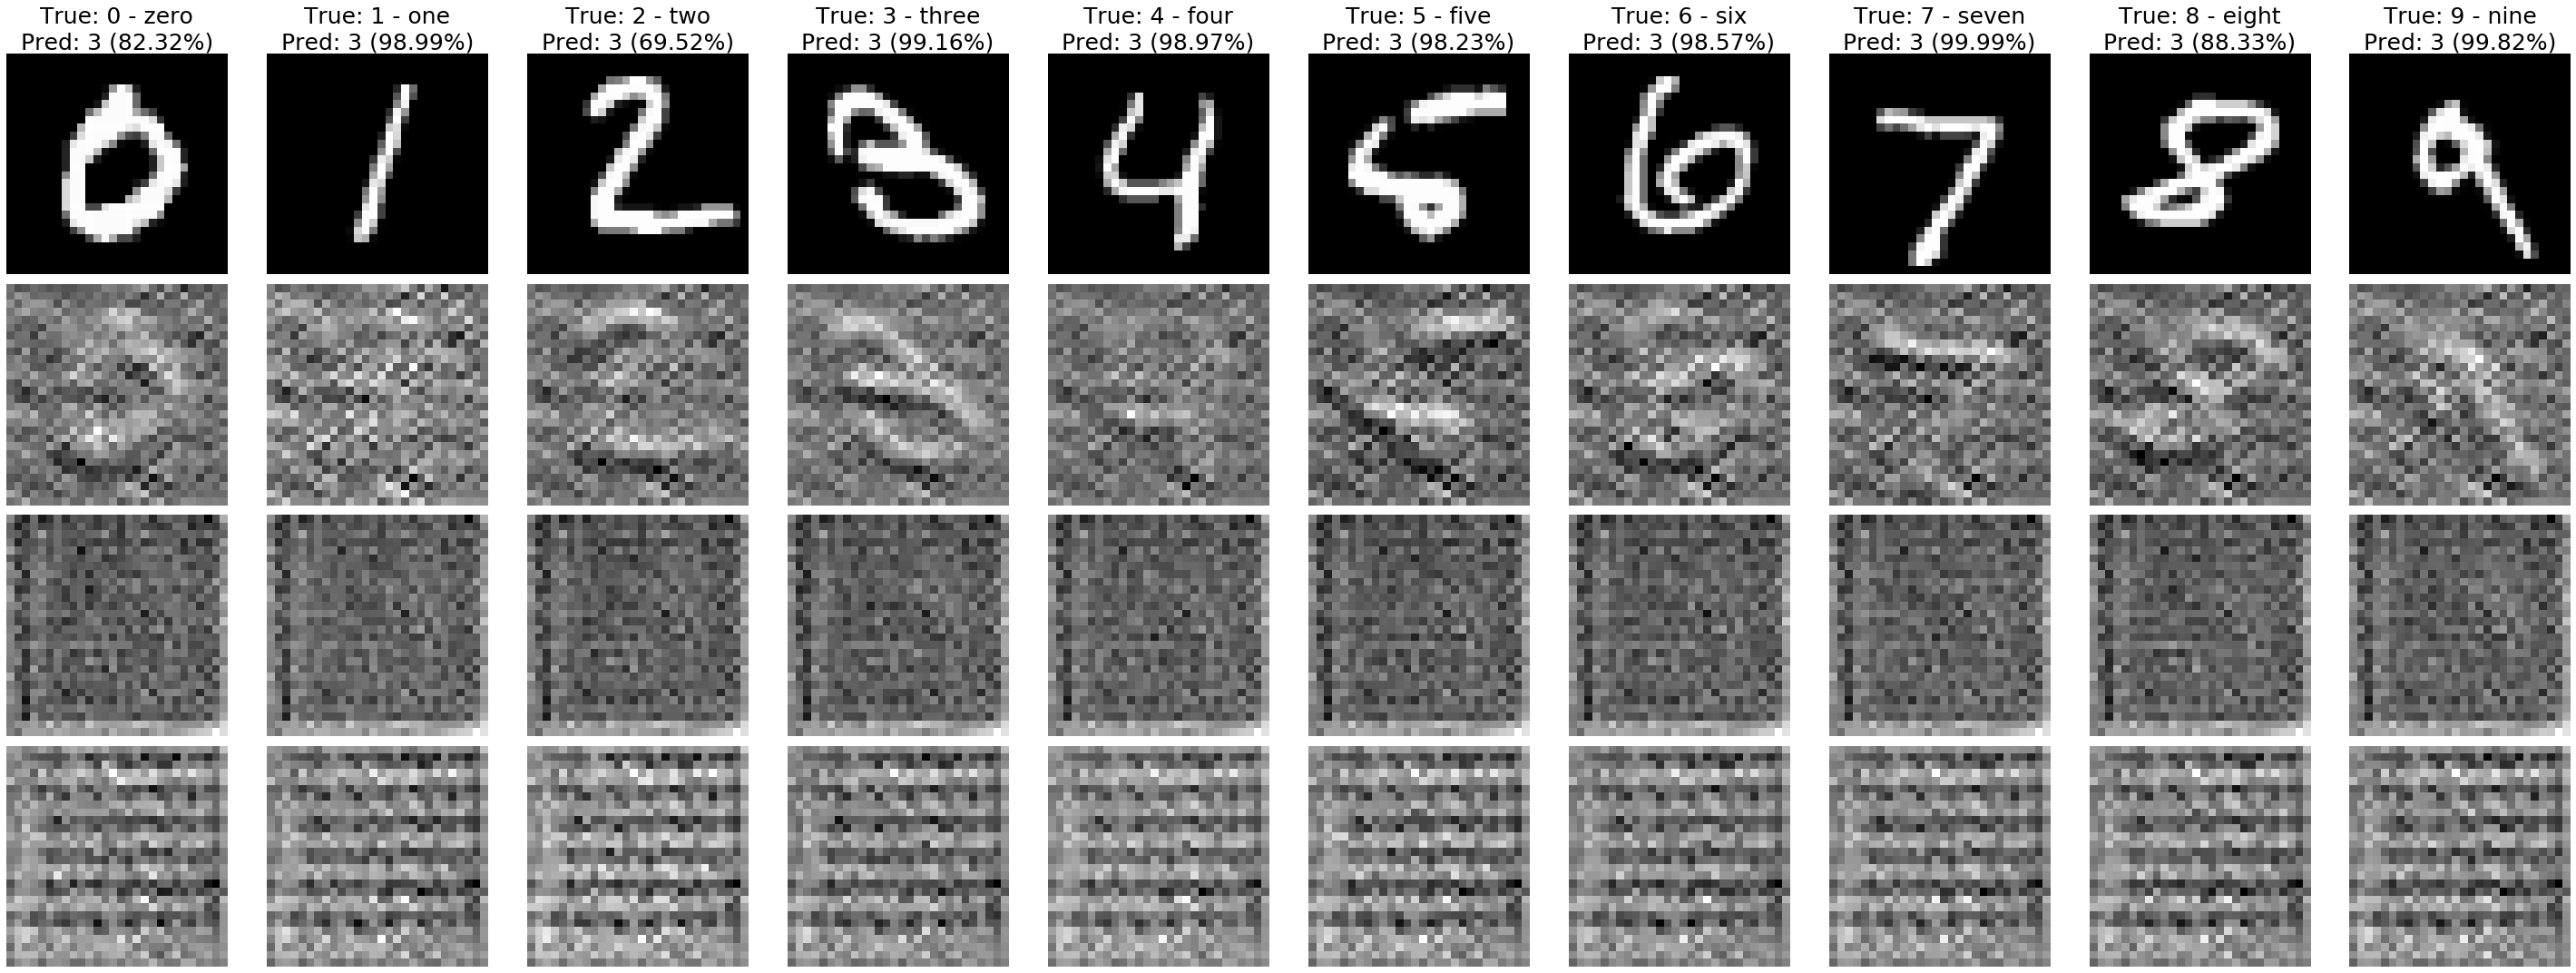

In [11]:
f, ax = plt.subplots(4, 10, figsize=(40,15))
for i in range(10):
    # Raw images
    ax[0, i].imshow(original_images_mnist[i].squeeze(), 'gray')
    ax[0, i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(mnist_classes[i], int(preds[i]), probs[i]), size=25)
    
    # Deconv + SmoothGrad images
    ax[1, i].imshow(outputs[0+(i*3)].squeeze(), 'gray')
    ax[2, i].imshow(outputs[1+(i*3)].squeeze(), 'gray')
    ax[3, i].imshow(outputs[2+(i*3)].squeeze(), 'gray')
    
    ax[0, i].axis('off')
    ax[1, i].axis('off')
    ax[2, i].axis('off')
    ax[3, i].axis('off')

if image_save:
    plt.tight_layout()
    plt.savefig('../images/results/deconv_mnist_result_SmoothGrad(n{},sigma{}).jpg'.format(n, sigma), dpi=500)
    plt.show()

## CIFAR10

In [12]:
# output list
nb_class = 10
nb_layer = len(conv_layer_idx)
outputs = np.zeros((nb_class*nb_layer,) + original_images_cifar10.shape[1:], dtype=np.uint8) # (nb_class * nb_conv_layer, image size)
preds = np.zeros(10)
probs = np.zeros(10)

cnt = 0

# set parameter
n = 50
sigma = 10
output_size = (32,32,3)

for i in range(nb_class):
    img = pre_images_cifar10[i].unsqueeze(0)
    for conv_idx in conv_layer_idx:    
        output, prob, pred = generate_smooth_grad(img, output_size, n, sigma, conv_idx, cifar10_deconvnet, i)
        outputs[cnt] = output
        cnt += 1
        
    preds[i] = pred
    probs[i] = prob

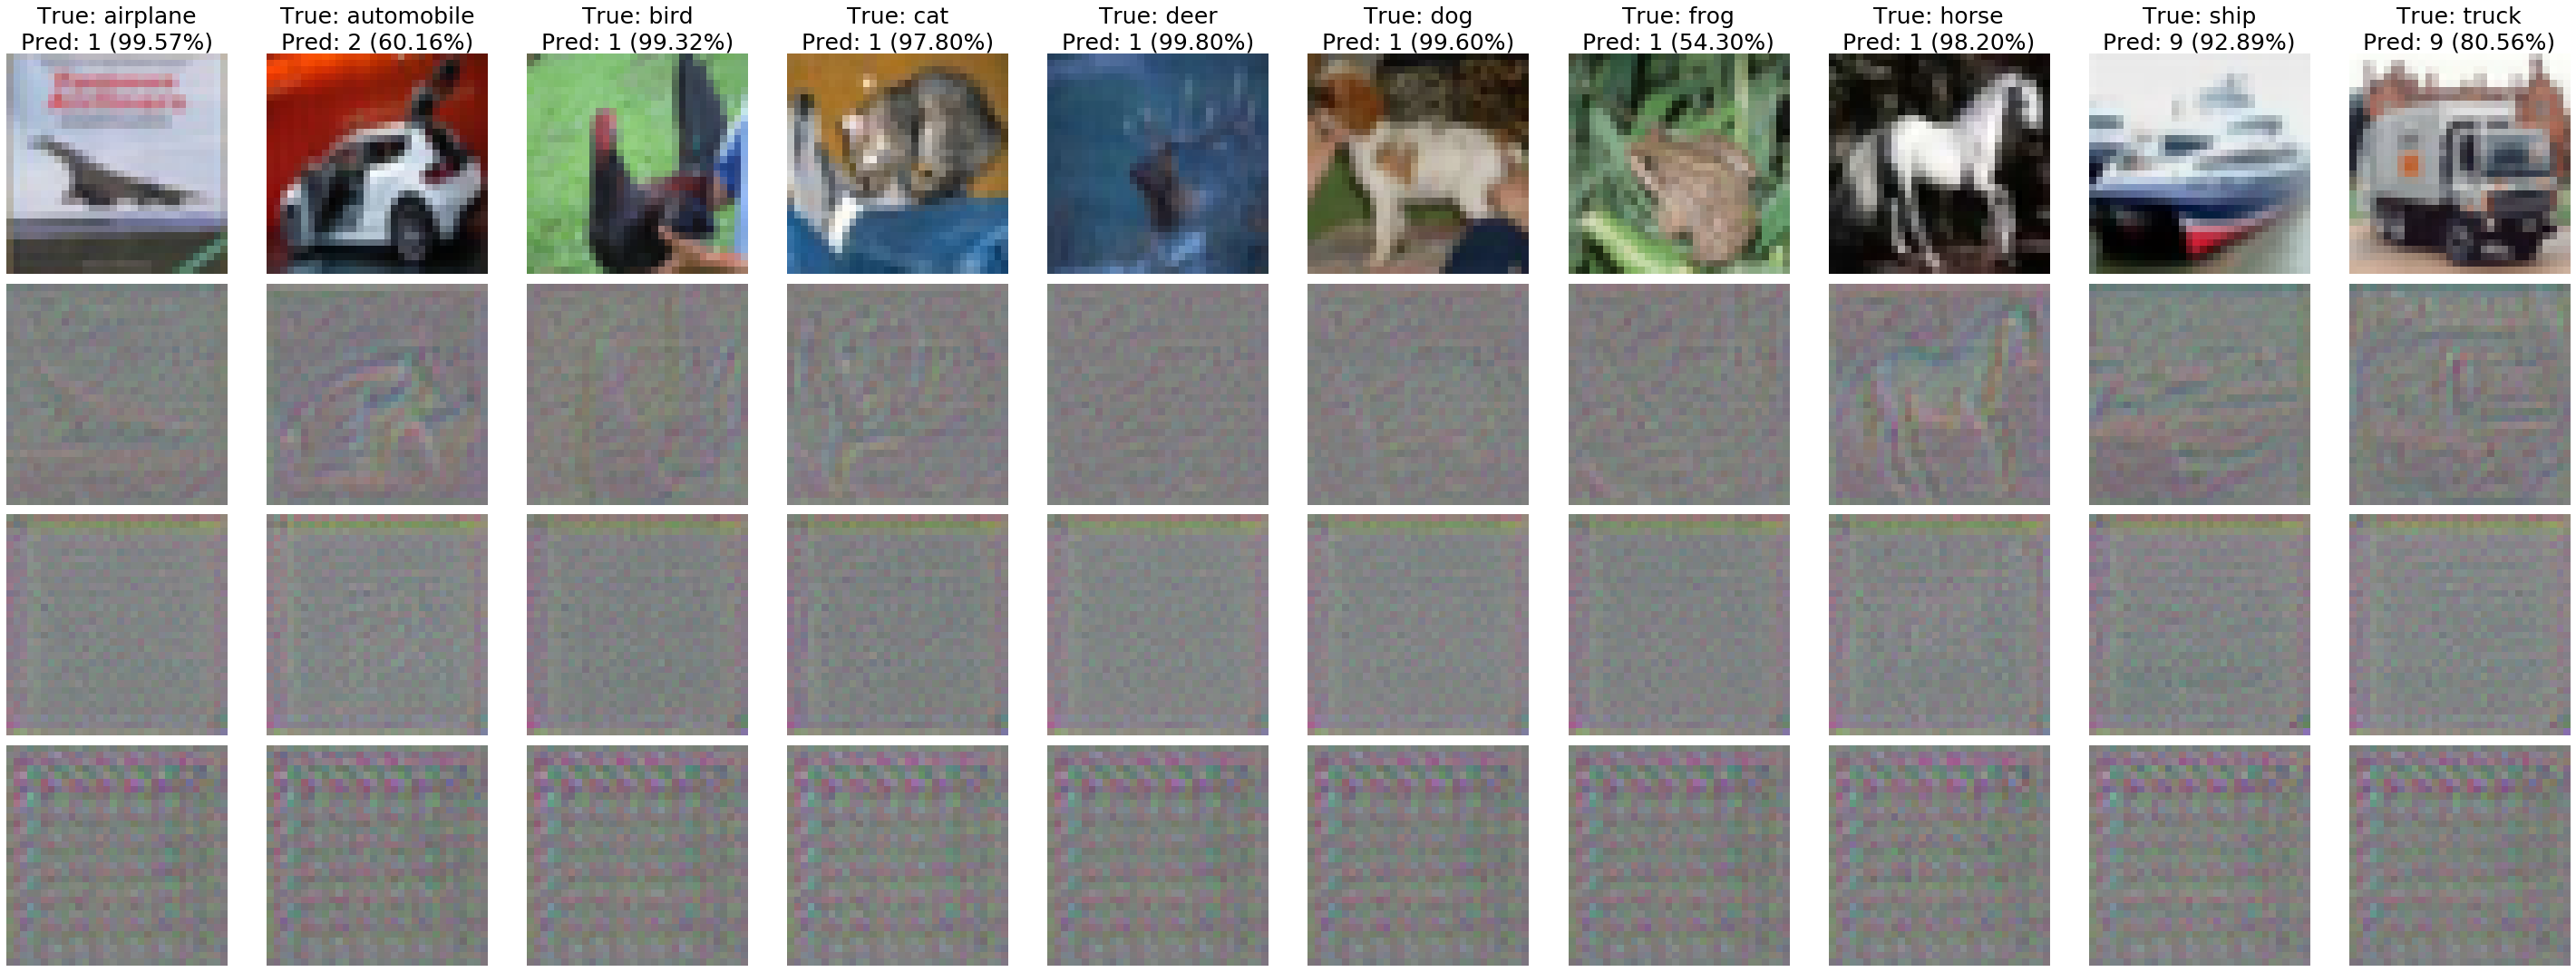

In [13]:
f, ax = plt.subplots(4, 10, figsize=(40,15))
for i in range(10):
    # Raw images
    ax[0, i].imshow(original_images_cifar10[i].squeeze())
    ax[0, i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(cifar10_classes[i], int(preds[i]), probs[i]), size=25)
    
    # Deconv + SmoothGrad images
    ax[1, i].imshow(outputs[0+(i*3)])
    ax[2, i].imshow(outputs[1+(i*3)])
    ax[3, i].imshow(outputs[2+(i*3)])
    
    ax[0, i].axis('off')
    ax[1, i].axis('off')
    ax[2, i].axis('off')
    ax[3, i].axis('off')

if image_save:
    plt.tight_layout()
    plt.savefig('../images/results/deconv_cifar10_result_SmoothGrad(n{},sigma{}).jpg'.format(n, sigma), dpi=500)
    plt.show()